<a href="https://colab.research.google.com/github/blue-rock/Email_Network_Analysis/blob/main/Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as ntx

print(ntx.__version__)

2.6.3


In [ ]:
#ntdf = network dataframe
ntdf = pd.read_csv('email-Eu-core.txt', sep=' ', header = None)
ntdf.head()

,0,1
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


Adjacency Matrix for the given network

In [ ]:
edgeList = ntdf.values.tolist()
G = ntx.Graph()
for i in range(len(edgeList)):
    G.add_edge(edgeList[i][0], edgeList[i][1])
A = ntx.adjacency_matrix(G).A
A

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
graph2 = G
graph2.remove_edges_from(ntx.selfloop_edges(graph2))
k_core_graph = ntx.k_core(G, k=1)
ntx.write_graphml(k_core_graph, '/content/k-core_graph.graphml')
k_core_2_graph = ntx.k_core(G,k=2)
ntx.write_graphml(k_core_2_graph, '/content/k-core_graph_2.graphml')
k_core_3_graph = ntx.k_core(G,k=3)
ntx.write_graphml(k_core_3_graph, '/content/k-core_graph_3.graphml')
k_core_4_graph = ntx.k_core(G,k=4)
ntx.write_graphml(k_core_4_graph, '/content/k-core_graph_4.graphml')
k_core_5_graph = ntx.k_core(G,k=5)
ntx.write_graphml(k_core_5_graph, '/content/k-core_graph_5.graphml')
k_core_6_graph = ntx.k_core(G,k=6)
ntx.write_graphml(k_core_6_graph, '/content/k-core_graph_6.graphml')
k_core_15_graph = ntx.k_core(G,k=15)
ntx.write_graphml(k_core_15_graph, '/content/k-core_graph_15.graphml')
k_core_500_graph = ntx.k_core(G,k=20)
ntx.write_graphml(k_core_500_graph, '/content/k-core_graph_100.graphml')
k_core_5000_graph = ntx.k_core(G,k=5000)
ntx.write_graphml(k_core_500_graph, '/content/k-core_graph_5000.graphml')

In [ ]:
#generating email network from the given edge list
email_nt = ntx.from_pandas_edgelist(ntdf, source = 0, target = 1)


density measures the fraction of existing edges out of the possible edges
directed networks: m/n(n-1)
undirectd networks: 2m/n(n-1)
this is much faster than calculating: nx.number_of_edges(G)/nx.non_edges(G)

In [ ]:
density=ntx.density(email_nt)
print("Density: {:.5f}".format(density))

Density: 0.03311


The average clustering coefficient is not to be confused with the clustering coefficient of the
whole network—the fraction of all possible triangles that exist in the network.

In [ ]:
avg_clustering = ntx.average_clustering(email_nt)
print("Average Clustering: {}".format(avg_clustering))

Average Clustering: 0.3993549664221539


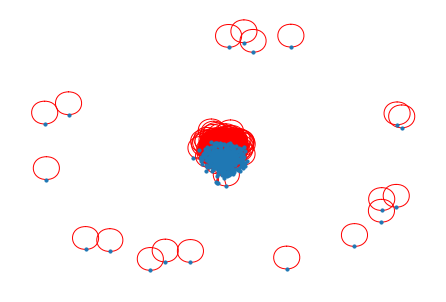

In [ ]:
ntx.draw(email_nt, node_size = 10, edge_color = 'red')
#this image has subgraphs which has one node too, but they aren't usefull as they are not ommunicating with anyone

In [ ]:
#getting groupwise networks which are connected
parts_generator = ntx.connected_components(email_nt)

parts = list(parts_generator)
parts

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [ ]:
#removing all the subgraphs which only has one member in it
single_subgraphs = [list(x)[0] for x in parts[1:]]

email_nt.remove_nodes_from(single_subgraphs)
single_subgraphs


[580,
 633,
 648,
 653,
 658,
 660,
 670,
 675,
 684,
 691,
 703,
 711,
 731,
 732,
 744,
 746,
 772,
 798,
 808]

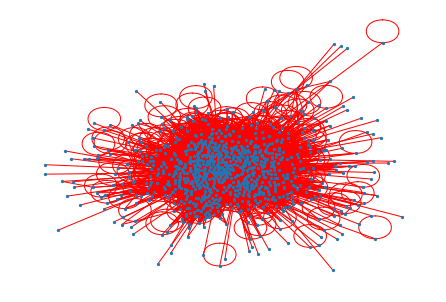

In [ ]:
#let us draw the graph now without any single node subgraph
ntx.draw(email_nt, node_size = 5, edge_color = 'red')


In [ ]:
email_nt.degree

DegreeView({0: 44, 1: 52, 2: 95, 3: 71, 4: 96, 5: 171, 6: 115, 7: 72, 8: 37, 9: 40, 10: 47, 11: 76, 12: 58, 13: 180, 14: 80, 15: 52, 16: 74, 17: 111, 18: 56, 19: 72, 20: 74, 21: 138, 22: 15, 23: 81, 24: 40, 25: 33, 26: 35, 27: 63, 28: 105, 29: 58, 30: 68, 31: 50, 32: 35, 33: 30, 34: 31, 35: 59, 36: 45, 37: 37, 38: 47, 39: 36, 40: 60, 41: 91, 42: 75, 43: 14, 44: 106, 45: 48, 46: 73, 47: 51, 48: 59, 49: 15, 50: 17, 51: 69, 52: 26, 53: 40, 54: 51, 55: 43, 56: 48, 57: 67, 58: 126, 59: 53, 60: 55, 61: 71, 62: 216, 63: 125, 64: 170, 65: 91, 66: 36, 67: 9, 68: 48, 69: 64, 70: 18, 71: 18, 72: 8, 73: 31, 74: 93, 75: 22, 76: 24, 77: 25, 78: 23, 79: 44, 80: 72, 81: 113, 82: 233, 83: 141, 84: 132, 85: 39, 86: 218, 87: 139, 88: 33, 89: 71, 90: 29, 91: 31, 92: 44, 93: 87, 94: 44, 95: 48, 96: 120, 97: 25, 98: 25, 99: 29, 100: 41, 101: 29, 102: 23, 103: 52, 104: 33, 105: 146, 106: 142, 107: 221, 108: 43, 109: 5, 110: 11, 111: 8, 112: 21, 113: 87, 114: 142, 115: 131, 116: 83, 117: 20, 118: 32, 119: 14,

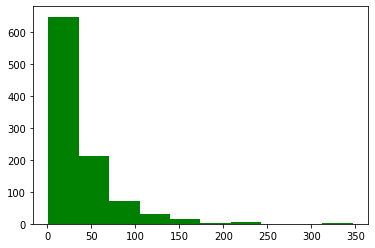

33.84787018255578

In [ ]:
all_degrees = [deg for n, deg in email_nt.degree]

plt.hist(all_degrees, color='green')
plt.show()

np.mean(all_degrees)

In [ ]:
#tells us how well connected the neighbourhood of a node is
clustering_coeff = ntx.clustering(email_nt)
clustering_coeff

{0: 0.2764227642276423,
 1: 0.2653061224489796,
 2: 0.2978027115474521,
 3: 0.38491048593350385,
 4: 0.31869137497140243,
 5: 0.10700197238658778,
 6: 0.15518331226295828,
 7: 0.28778467908902694,
 8: 0.4470588235294118,
 9: 0.42532005689900426,
 10: 0.3154486586493987,
 11: 0.22917437985931136,
 12: 0.3025974025974026,
 13: 0.11089951120421507,
 14: 0.21578421578421578,
 15: 0.3526530612244898,
 16: 0.28470936690114773,
 17: 0.28593272171253825,
 18: 0.30118798043326345,
 19: 0.28322981366459626,
 20: 0.28482003129890454,
 21: 0.24803921568627452,
 22: 0.38461538461538464,
 23: 0.3427458617332035,
 24: 0.38549075391180654,
 25: 0.48295454545454547,
 26: 0.5208333333333334,
 27: 0.36885245901639346,
 28: 0.34475537787930705,
 29: 0.3935064935064935,
 30: 0.4027972027972028,
 31: 0.4122340425531915,
 32: 0.5473484848484849,
 33: 0.5793650793650794,
 34: 0.6379310344827587,
 35: 0.41228070175438597,
 36: 0.46511627906976744,
 37: 0.43025210084033616,
 38: 0.39595959595959596,
 39: 0.4812

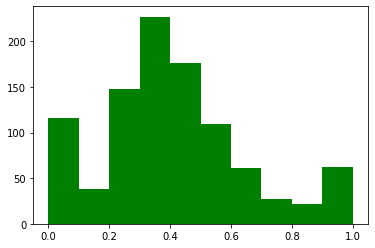

0.4070504475195386

In [ ]:
plt.hist(list(clustering_coeff.values()), color='green')
plt.show()

np.mean(list(clustering_coeff.values()))

In [ ]:
ntx.average_shortest_path_length(email_nt)

2.586933824816466

In [ ]:
ntx.diameter(email_nt)

7

In [ ]:
#cliques: sub-set of a network in which the actors are more closely and intensely tied to one another than they are to other members of the network.
cliques = ntx.find_cliques(email_nt)
len(list(cliques))

42709

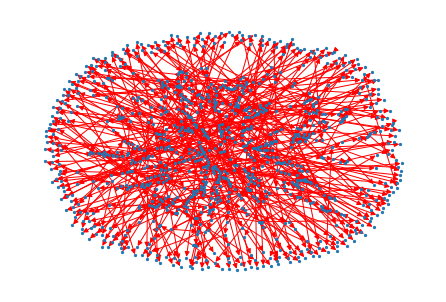

In [ ]:
nt_tree = ntx.dfs_tree(email_nt, 0)
ntx.draw(nt_tree, node_size = 5, edge_color = 'red')

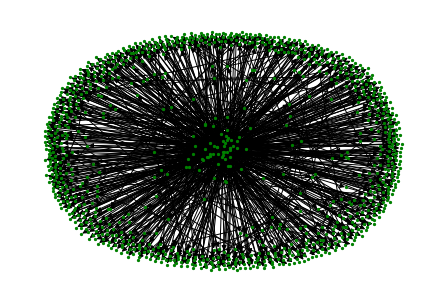

In [ ]:
nt_tree = ntx.bfs_tree(email_nt, 0)
ntx.draw(nt_tree, node_size = 5, node_color='green', edge_color = 'black')

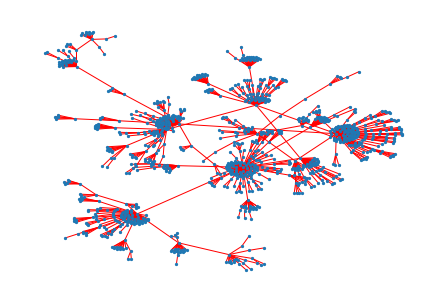

In [ ]:
nt_tree = ntx.minimum_spanning_tree(email_nt)

ntx.draw(nt_tree, node_size = 5, edge_color = 'red')

#Communities

In [ ]:
G = ntx.DiGraph();
id_length = 7

with open('email-Eu-core.txt') as file:
    for line in file.readlines():
        nodes = tuple(int(x) for x in line.split(" "))
        n1, n2 = nodes
        G.add_node(n1)
        G.add_node(n2)
        G.add_edge(n1,n2)

n_edges=len(G.edges())
n_nodes=len(G.nodes())

print("# Nodes: {}".format(n_nodes))
print("# Edges: {}".format(n_edges))

# Nodes: 1005
# Edges: 25571


In [ ]:
G

Centrality

In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import collections

In [ ]:
import operator

In-degree


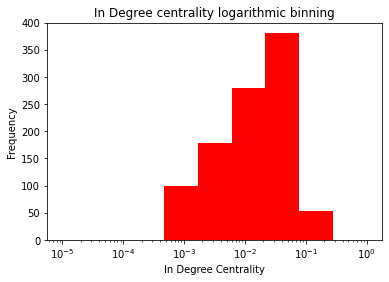

[  0.   0.   0.  99. 179. 279. 381.  53.   0.]


In [ ]:
# In Degree centrality stats
print("In-degree")
in_degree_centrality_nodes = ntx.in_degree_centrality(G)
in_degree_centrality_nodes = sorted(in_degree_centrality_nodes.items(), key=operator.itemgetter(1), reverse=True)
in_degree_centrality = [val for node,val in in_degree_centrality_nodes]
counts_pr, bins_pr, bars_pr = plt.hist(in_degree_centrality, bins=np.logspace(start=np.log10(0.00001), stop=np.log10(1), num=10), color = 'red')
plt.gca().set_xscale("log")
plt.title("In Degree centrality logarithmic binning")
plt.xlabel('In Degree Centrality')
plt.ylabel('Frequency')
plt.show()
print(counts_pr)

In [ ]:
in_degree_centrality

[0.21115537848605578,
 0.17828685258964144,
 0.16832669322709162,
 0.15637450199203187,
 0.15338645418326693,
 0.150398406374502,
 0.14243027888446214,
 0.13844621513944222,
 0.13545816733067728,
 0.13147410358565736,
 0.12749003984063745,
 0.12649402390438247,
 0.12350597609561753,
 0.1205179282868526,
 0.11952191235059761,
 0.11752988047808764,
 0.11752988047808764,
 0.11553784860557768,
 0.1145418326693227,
 0.11155378486055777,
 0.11055776892430279,
 0.10856573705179283,
 0.10856573705179283,
 0.10856573705179283,
 0.10557768924302789,
 0.10358565737051792,
 0.10358565737051792,
 0.10258964143426294,
 0.10059760956175298,
 0.10059760956175298,
 0.09860557768924302,
 0.09661354581673307,
 0.09561752988047809,
 0.09561752988047809,
 0.09561752988047809,
 0.09362549800796813,
 0.09262948207171315,
 0.09163346613545817,
 0.09163346613545817,
 0.09163346613545817,
 0.09163346613545817,
 0.08964143426294821,
 0.08964143426294821,
 0.08764940239043825,
 0.08665338645418326,
 0.08565737051

Out-degree


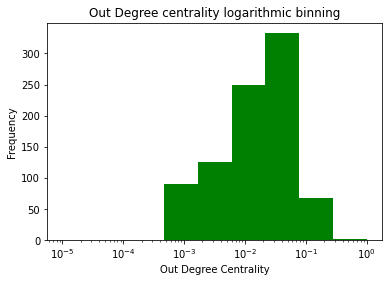

[  0.   0.   0.  90. 126. 250. 333.  68.   1.]


In [ ]:
# Out Degree Centrality Stats
print("Out-degree")
out_degree_centrality_nodes = ntx.out_degree_centrality(G)
out_degree_centrality_nodes = sorted(out_degree_centrality_nodes.items(), key=operator.itemgetter(1), reverse=True)
out_degree_centrality = [val for node,val in out_degree_centrality_nodes]
counts_pr, bins_pr, bars_pr = plt.hist(out_degree_centrality, bins=np.logspace(start=np.log10(0.00001), stop=np.log10(1), num=10), color = 'green')
plt.gca().set_xscale("log")
plt.title("Out Degree centrality logarithmic binning")
plt.xlabel('Out Degree Centrality')
plt.ylabel('Frequency')
plt.show()
print(counts_pr)

In [ ]:
out_degree_centrality_nodes

[(160, 0.33266932270916333),
 (82, 0.22609561752988047),
 (121, 0.22111553784860558),
 (107, 0.20318725099601592),
 (86, 0.20119521912350596),
 (62, 0.1892430278884462),
 (13, 0.17131474103585656),
 (249, 0.1593625498007968),
 (183, 0.15836653386454183),
 (434, 0.15637450199203187),
 (5, 0.1553784860557769),
 (211, 0.14442231075697212),
 (129, 0.13545816733067728),
 (377, 0.13047808764940239),
 (84, 0.1294820717131474),
 (21, 0.12848605577689243),
 (114, 0.12649402390438247),
 (87, 0.12450199203187251),
 (166, 0.12450199203187251),
 (333, 0.12450199203187251),
 (533, 0.12250996015936255),
 (142, 0.11952191235059761),
 (820, 0.11952191235059761),
 (83, 0.11852589641434262),
 (105, 0.11852589641434262),
 (283, 0.11752988047808764),
 (282, 0.11653386454183266),
 (58, 0.1145418326693227),
 (63, 0.11354581673306773),
 (64, 0.11254980079681275),
 (252, 0.11254980079681275),
 (424, 0.11254980079681275),
 (115, 0.11155378486055777),
 (128, 0.10956175298804781),
 (405, 0.10956175298804781),
 (6

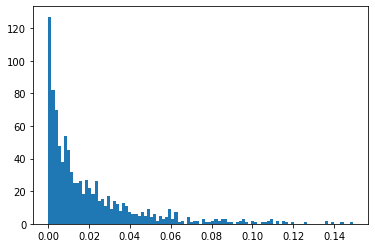

In [ ]:
# Eigen Vector centrality stats
# print("Eigen Vector centrality")
# eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
# eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
# for k, v in eigenvector_centrality_nodes.most_common(10):
#     print ((k, v))

cen_eigen = ntx.eigenvector_centrality_numpy(G).values();
n1,x1,_1 = plt.hist(cen_eigen,bins=np.linspace(0.0001, max(cen_eigen), 100))
#n1,x1,_1 = plt.hist(cen_eigen,bins=np.logspace(start=np.log10(0.00001), stop=np.log10(1), num=10))


In [ ]:
max(cen_eigen)

0.149207730215431

In [ ]:
# Katz centrality stats
print("Katz centrality")
katz_centrality_numpy_nodes = ntx.katz_centrality_numpy(G)
katz_centrality_numpy_nodes = collections.Counter(katz_centrality_numpy_nodes)
for k, v in katz_centrality_numpy_nodes.most_common(10):
  print ((k, v))

Katz centrality
(84, 0.17271020446671365)
(433, 0.1604154493979983)
(71, 0.14641608049868257)
(50, 0.12314093428610086)
(288, 0.11261831611288756)
(431, 0.10931162148284765)
(49, 0.10756510659487527)
(494, 0.10501241955701036)
(283, 0.10285840675021578)
(217, 0.1026592199303793)


In [ ]:
import math

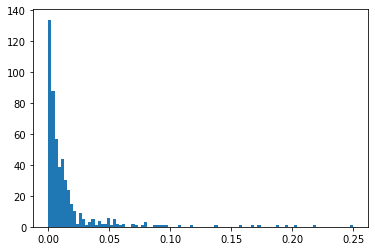

In [ ]:
# Eigen Vector centrality stats
# print("Eigen Vector centrality")
# eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
# eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
# for k, v in eigenvector_centrality_nodes.most_common(10):
#     print ((k, v))
phi = 0.149207730215431;
cen_katz = ntx.katz_centrality_numpy(G,1/phi).values();
n1,x1,_1 = plt.hist(cen_katz,bins=np.linspace(0.0001, max(cen_katz), 100))
#n1,x1,_1 = plt.hist(cen_eigen,bins=np.logspace(start=np.log10(0.00001), stop=np.log10(1), num=10))


In [ ]:
# Closeness centrality stats
# Not running on colab
print("closeness centrality ")
closeness_centrality_nodes = ntx.closeness_centrality(G)
closeness_centrality_nodes = collections.Counter(closeness_centrality_nodes)
for k, v in closeness_centrality_nodes.most_common(10):
  print ((k, v))


closeness centrality 
(160, 0.4496688397114823)
(62, 0.4367960817756949)
(107, 0.43313263076725356)
(434, 0.42843368072064014)
(121, 0.42761501763646054)
(86, 0.423034390478414)
(64, 0.4214410406084389)
(129, 0.4190733943128858)
(183, 0.4185508589085057)
(128, 0.41725020366018833)


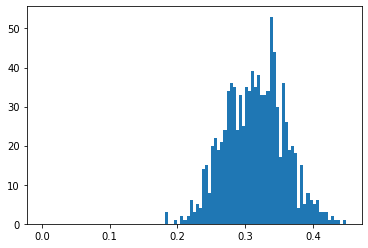

In [ ]:
# Eigen Vector centrality stats
# print("Eigen Vector centrality")
# eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
# eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
# for k, v in eigenvector_centrality_nodes.most_common(10):
#     print ((k, v))
phi = 0.149207730215431;
closeness_centrality_nodes = ntx.closeness_centrality(G).values();
n1,x1,_1 = plt.hist(closeness_centrality_nodes,bins=np.linspace(0.0001, max(closeness_centrality_nodes), 100))
#n1,x1,_1 = plt.hist(cen_eigen,bins=np.logspace(start=np.log10(0.00001), stop=np.log10(1), num=10))


In [ ]:
# Betweenness centrality stats
# Not running on colab
print("Betweenness centrality ")
betweenness_centrality_nodes = ntx.betweenness_centrality(G)
betweenness_centrality_nodes = collections.Counter(betweenness_centrality_nodes)
for k, v in betweenness_centrality_nodes.most_common(10):
  print ((k, v))

Betweenness centrality 
(160, 0.07212078608028884)
(86, 0.037432912122184775)
(5, 0.026984804243671952)
(121, 0.024532102889508717)
(62, 0.02451110558180135)
(107, 0.02185778938072534)
(64, 0.01866532308007618)
(82, 0.018229609890582157)
(377, 0.016220465196907407)
(129, 0.015569466534401019)


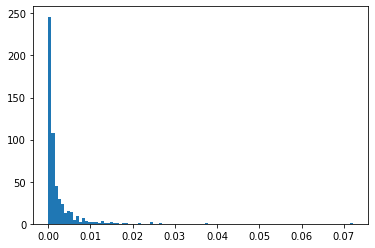

In [ ]:
# Eigen Vector centrality stats
# print("Eigen Vector centrality")
# eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
# eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
# for k, v in eigenvector_centrality_nodes.most_common(10):
#     print ((k, v))
phi = 0.149207730215431;
betweenness_centrality_nodes = ntx.betweenness_centrality(G).values();
n1,x1,_1 = plt.hist(betweenness_centrality_nodes,bins=np.linspace(0.0001, max(betweenness_centrality_nodes), 100))
#n1,x1,_1 = plt.hist(cen_eigen,bins=np.logspace(start=np.log10(0.00001), stop=np.log10(1), num=10))


In [ ]:
import powerlaw

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
2.7453320333942326
0.1084496557184573


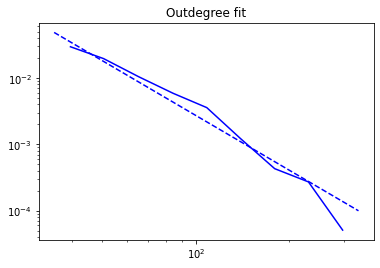

In [ ]:
# Outdegree power law
results_out_degree = powerlaw.Fit(np.array([d for n,d in G.out_degree()]),xmin=0,discrete=True)
print(results_out_degree.power_law.alpha)
plt.title('Outdegree fit')
results_out_degree.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
results_out_degree.plot_pdf(color= 'b')
print(results_out_degree.power_law.sigma)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
2.971174789242623
0.1184364145654149


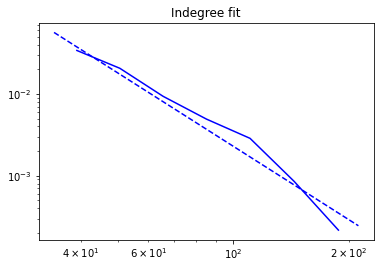

In [ ]:
# Indegree power law
plt.title('Indegree fit')
results_in_degree = powerlaw.Fit(np.array([d for n,d in G.in_degree()]),xmin=0,discrete=True)
print(results_in_degree.power_law.alpha)
results_in_degree.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
results_in_degree.plot_pdf(color= 'b')
print(results_in_degree.power_law.sigma)

DiGraph with 1005 nodes and 25571 edges
Is Directed: True
Is Weighted: False


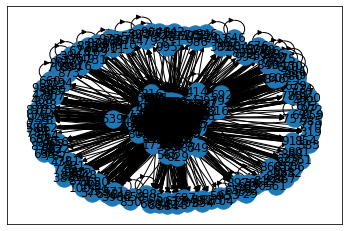

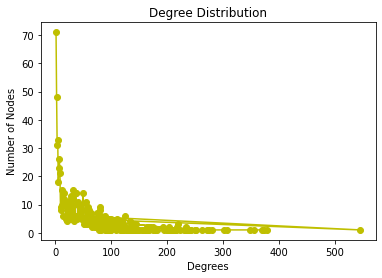

In [ ]:
# Generate the graph reading the dataset in txt format
G_stats = ntx.read_edgelist('email-Eu-core.txt', create_using = ntx.DiGraph())

def plot_degree_distribution(G_stats):
    degrees =  [val for (node, val) in G.degree()]
    list_degrees = list(set(degrees))

    list_distribution = []
    for i in list_degrees:
        x = degrees.count(i)
        list_distribution.append(x)

    plt.plot(list_degrees, list_distribution, 'yo-')
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution')
    plt.show()

# Print the graph information
# Type: Graph
# Number of nodes
# Number of edges
# Average degree
# Is Directed ?
# Is Weighted ?
print (ntx.info(G_stats))
print ('Is Directed: {}'.format(ntx.is_directed(G_stats)))
print ('Is Weighted: {}'.format(ntx.is_weighted(G_stats)))

# Drawing the Graph using matplotlib
ntx.draw_networkx(G_stats)
plt.show()

# After the Graph plotting, we can see the distribution of the nodes and the edges, the most of the nodes are concentred
# in the central part of the graph, and some of them are in the peripherical location, it means, around the core, unlinked
# to the others.

plot_degree_distribution(G_stats)

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import comb

edge_link = pd.read_table("email-Eu-core.txt",' ',header=None)
labels_res = pd.read_table("email-Eu-core-department-labels.txt"," ",header=None)
# label_class = 42 # from 0 to 41
max_id = max(edge_link[0].max(),edge_link[1].max()) + 1
label_class = len(labels_res[1].unique())

graph_array = np.zeros((max_id, max_id))
for index,row in edge_link.iterrows():
    graph_array[row[0]][row[1]] = 1
    graph_array[row[1]][row[0]] = 1




def rand_index_score(clusters, classes):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

def main():
    kmeans = KMeans(n_clusters=label_class).fit(graph_array)
    return rand_index_score(kmeans.labels_,labels_res[1])

def loop():
    sum = 0.0
    for i in range(0,10):
        sum = sum + main()
    print("Average result  is  ",sum/10)

if __name__ == '__main__':
    loop()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


Average result  is   0.7358924501000972


Weakly connected components

In [ ]:
weak_components = list(ntx.weakly_connected_components(G))
weak_components_count = len(weak_components)
[
    len(c)
    for c in sorted(ntx.weakly_connected_components(G), key=len, reverse=True)
]


[986, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
weak_components_count

20

Strongly connected components

In [ ]:
strong_components = list(ntx.strongly_connected_components(G))
strong_components_count = len(strong_components)
[
    len(c)
    for c in sorted(ntx.strongly_connected_components(G), key=len, reverse=True)
]

[803,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
strong_components_count

203

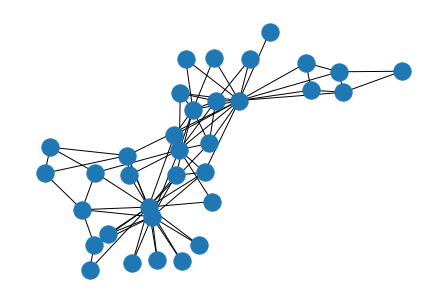

In [ ]:
#different communities in the email network.
diff_comms = ntx.karate_club_graph()
ntx.draw(diff_comms)

In [ ]:
partitions = ntx.algorithms.community.girvan_newman(diff_comms)

In [ ]:
part_list = list(partitions)
part_list

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {9},
  {11},
  {26}),
 ({0, 1, 3, 7, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {

In [ ]:
communities = part_list[3]
communities

({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9})

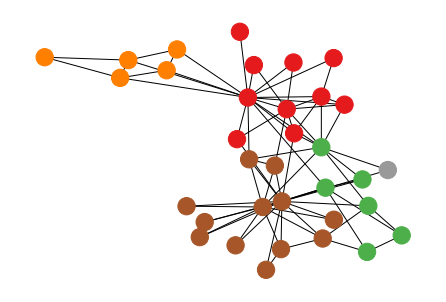

In [ ]:
colors = np.zeros(ntx.number_of_nodes(diff_comms))

for i in range(len(communities)):
    nodes = list(communities[i])
    for j in range(len(nodes)):
        colors[nodes[j]] = i

ntx.draw(diff_comms, node_color = colors, cmap=plt.cm.Set1)

In [ ]:
import community.community_louvain


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Clique percolation metrics:
Recall = 0.8412588792423047
Precision = 0.052460932693490836 
Purity = 0.17896389324960754
Modularity = 0.03605760995788807




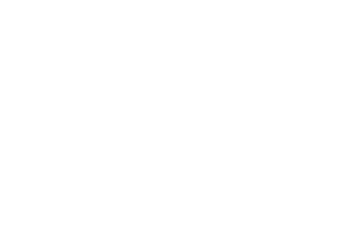

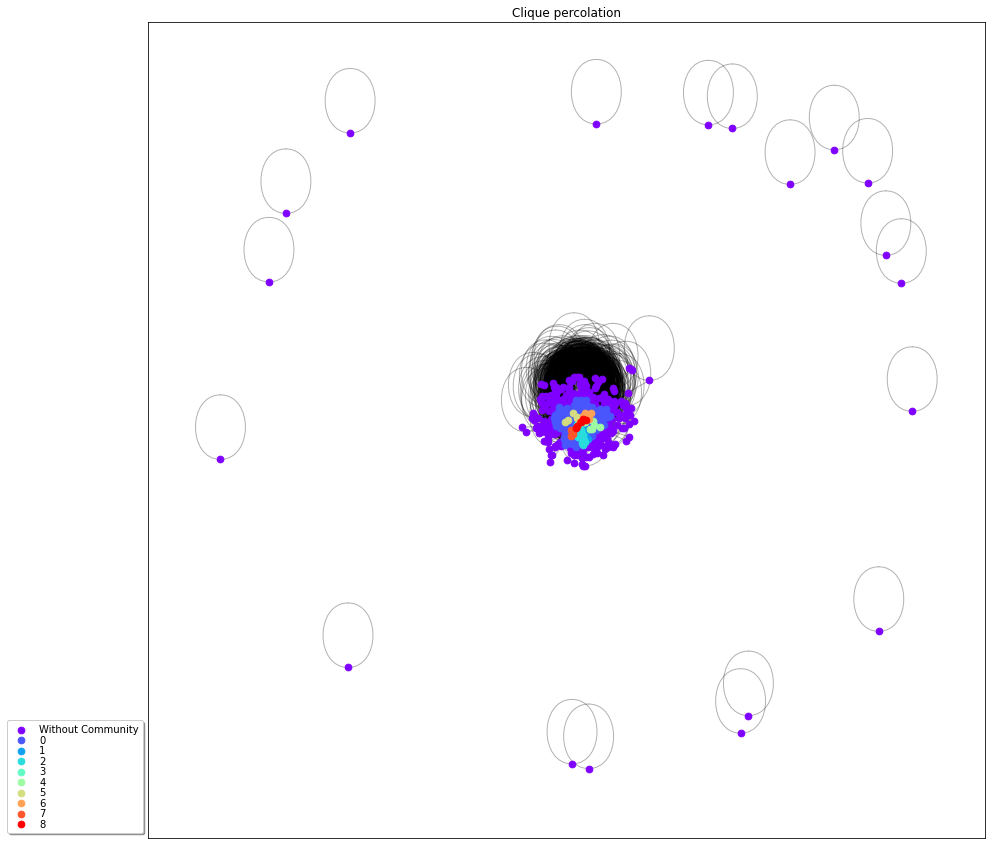

Louvain metrics:
Recall = 0.785295616717635
Precision = 0.2518868695675867 
Purity = 0.46368159203980097
Modularity = 0.4337228309751182




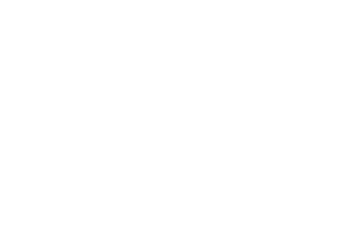

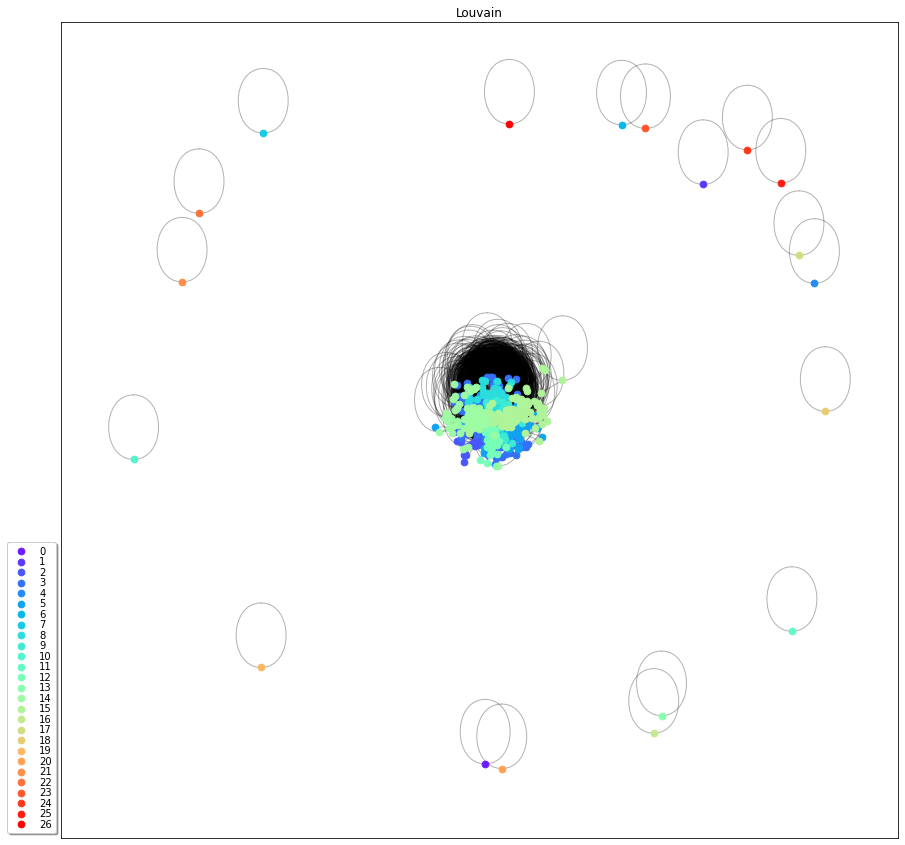

Girvan newman metrics:
Recall = 0.8983180428134556
Precision = 0.0460407161018425 
Purity = 0.15024875621890546
Modularity = 0.003583879527853089




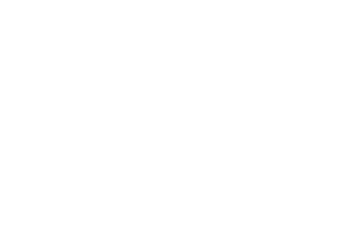

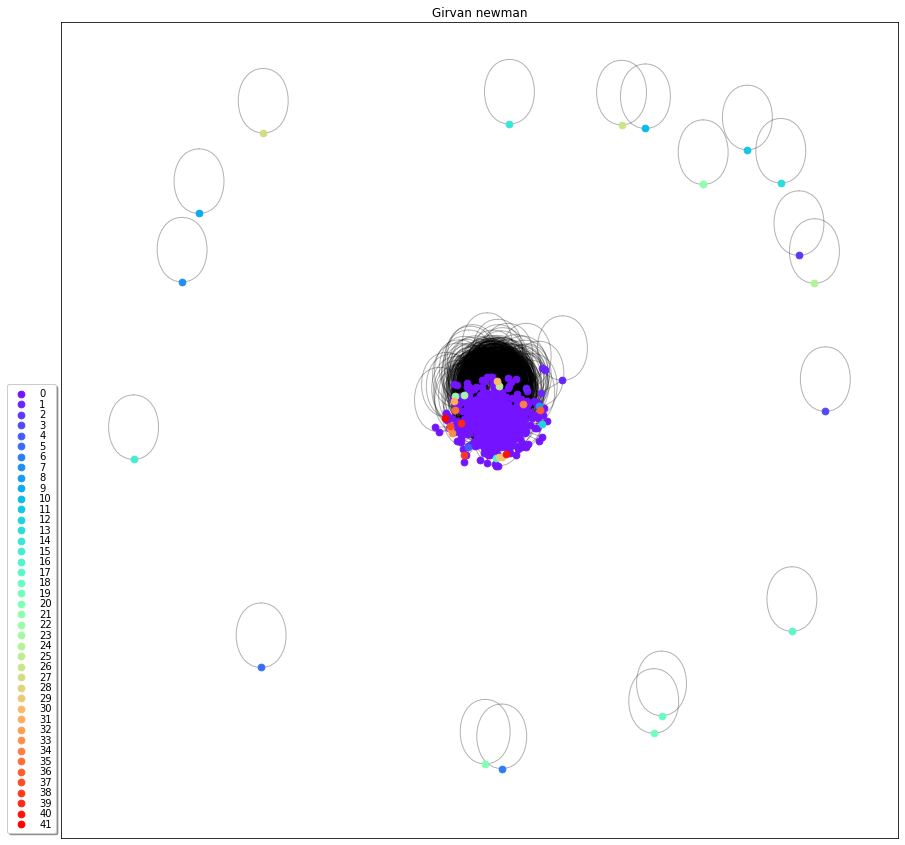

Spectral clustering metrics:
Recall = 0.41857798165137616
Precision = 0.431782334384858 
Purity = 0.681592039800995
Modularity = 0.3401043900336306




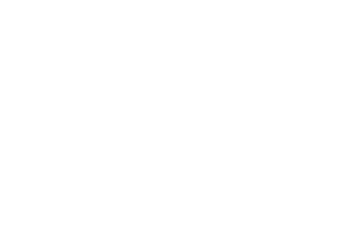

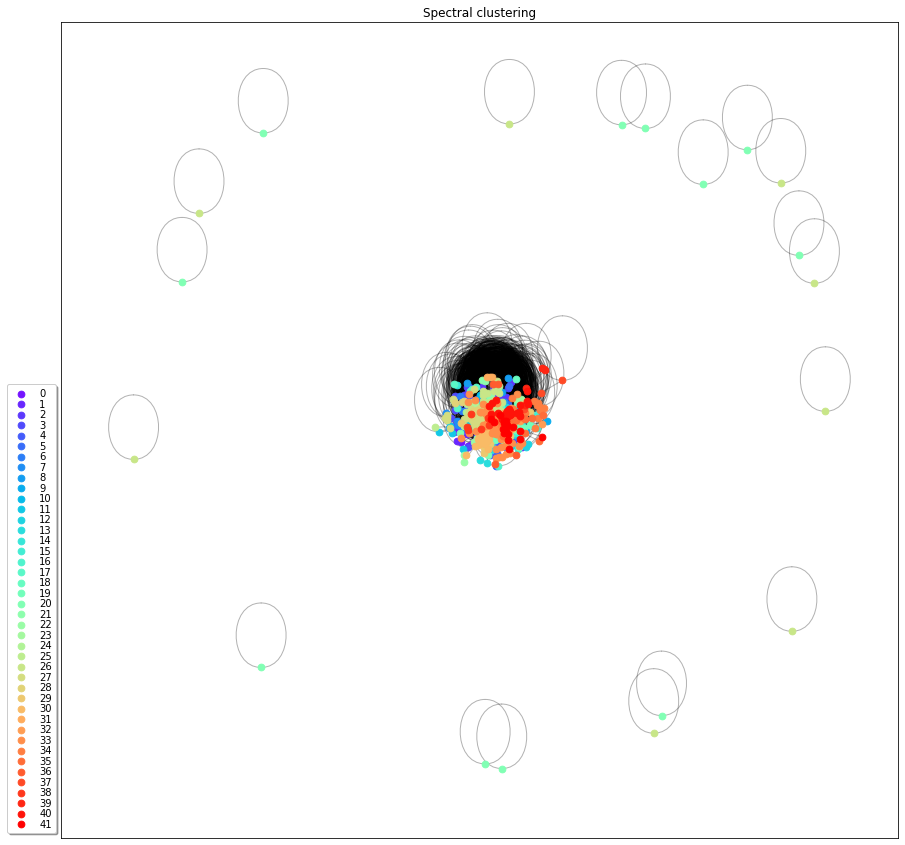

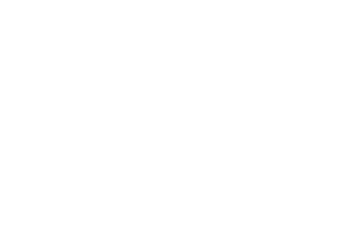

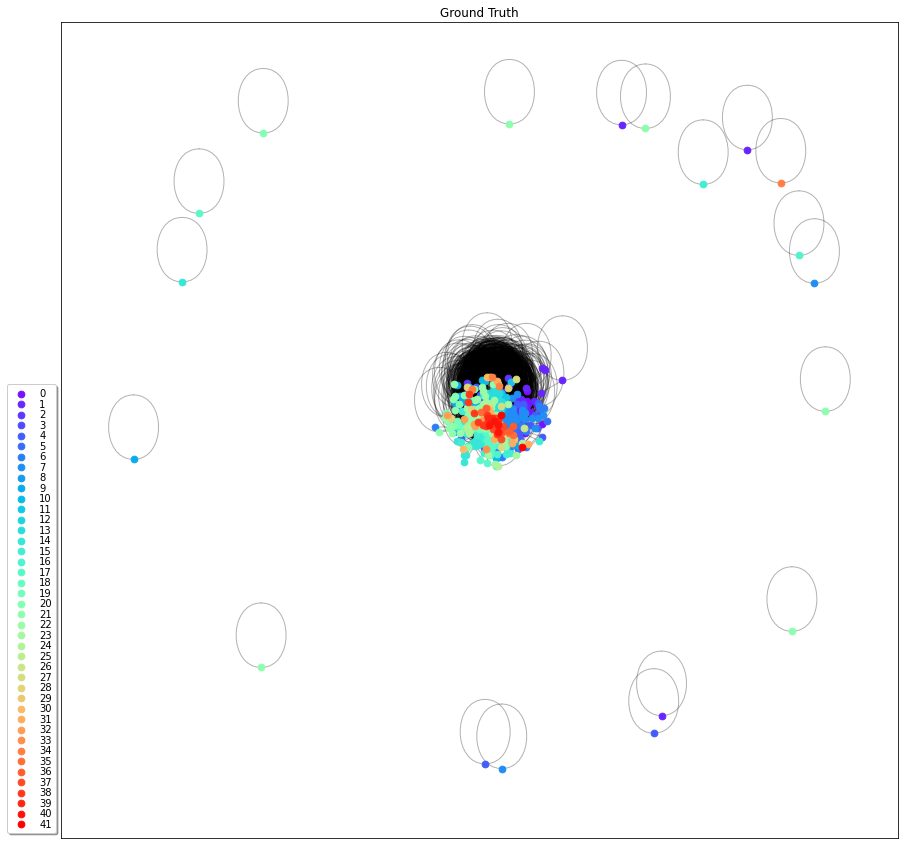

In [ ]:
import networkx as nx
from math import ceil
from textwrap import wrap

import community
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.colors import Normalize
from sklearn import metrics
from sklearn.cluster import SpectralClustering


def __purity_score(ground_truth, results, graph):
    # get from ground_truth only those that exist as key in results
    __ground_truth = {node_id: ground_truth[node_id] for node_id in results if node_id in ground_truth}
    y_true = [__ground_truth[node] for node in list(graph.nodes) if node in __ground_truth]
    y_pred = [results[node] for node in list(graph.nodes) if node in results]
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


def __calculate_modularity(graph, results):
    # group nodes by community_id
    grouped_members = {}
    for community_id in set(results.values()):
        grouped_members[community_id] = set()

    for member, community_id in results.items():
        grouped_members[community_id].add(member)

    communities = [frozenset(__community) for __community in grouped_members.values()]

    # take the subgraph which contains communities' nodes
    __sub_graph = graph.subgraph(list(results.keys())).copy()
    return nx.algorithms.community.quality.modularity(__sub_graph, communities)


def __calculate_tp_tn_fn_fp(ground_truth, results):
    # calculate tp, tn, fn and fp base on 23th slide from 4th lecture
    # every node that has not placed to a community is counted as fn
    fn = len({node_id for node_id in ground_truth if node_id not in results})
    tp, tn, fp = 0, 0, 0
    # a set to be sure that each pair is checked only once
    already_checked = set()
    for node_id, __community in ground_truth.items():
        if node_id not in results:
            continue
        for second_node_id, second_community in ground_truth.items():
            if second_node_id not in results:
                continue
            if second_node_id != node_id and (node_id, second_node_id) not in already_checked and \
                    (second_node_id, node_id) not in already_checked:
                already_checked.add((node_id, second_node_id))
                if __community != second_community:  # if nodes are not similar
                    if results[node_id] == results[second_node_id]:  # if nodes are assigned to same community
                        fp += 1
                    else:
                        tn += 1
                else:  # if nodes are similar
                    if results[node_id] == results[second_node_id]:  # if nodes are assigned to same community
                        tp += 1
                    else:
                        fn += 1
    return tp, tn, fn, fp


def __print_metrics_results(recall, precision, purity, modularity):
    print("Recall = {}\nPrecision = {} \nPurity = {}\nModularity = {}\n\n"
          .format(recall, precision, purity, modularity))


def louvain(graph):
    return community.community_louvain.best_partition(graph)


def spectral_clustering(graph, k_value):
    adj_mat = nx.to_numpy_matrix(graph)
    sc = SpectralClustering(k_value, affinity='precomputed', n_init=100, assign_labels='discretize')
    sc.fit(adj_mat)
    results = {str(node_id): __community for node_id, __community in enumerate(sc.labels_)}
    return results


def get_clique_percolation_communities_metrics(ground_truth, clique_percolation_communities, graph, pos):
    purity = __purity_score(ground_truth, clique_percolation_communities, graph)
    modularity = __calculate_modularity(graph, clique_percolation_communities)
    tp, tn, fn, fp = __calculate_tp_tn_fn_fp(ground_truth, clique_percolation_communities)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print("Clique percolation metrics:")
    __print_metrics_results(recall, precision, purity, modularity)
    __visualize_communities(graph, clique_percolation_communities, pos, 'Clique percolation')


def get_louvain_metrics(ground_truth, louvain_communities, graph, pos):
    purity = __purity_score(ground_truth, louvain_communities, graph)
    modularity = __calculate_modularity(graph, louvain_communities)
    tp, tn, fn, fp = __calculate_tp_tn_fn_fp(ground_truth, louvain_communities)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print("Louvain metrics:")
    __print_metrics_results(recall, precision, purity, modularity)
    __visualize_communities(graph, louvain_communities, pos, 'Louvain')


def get_girvan_newman_metrics(ground_truth, girvan_communities, graph, pos):
    purity = __purity_score(ground_truth, girvan_communities, graph)
    modularity = __calculate_modularity(graph, girvan_communities)
    tp, tn, fn, fp = __calculate_tp_tn_fn_fp(ground_truth, girvan_communities)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print("Girvan newman metrics:")
    __print_metrics_results(recall, precision, purity, modularity)
    __visualize_communities(graph, girvan_communities, pos, 'Girvan newman')


def get_spectral_clustering_metrics(ground_truth, spectral_clustering_communities, graph, pos):
    purity = __purity_score(ground_truth, spectral_clustering_communities, graph)
    modularity = __calculate_modularity(graph, spectral_clustering_communities)
    tp, tn, fn, fp = __calculate_tp_tn_fn_fp(ground_truth, spectral_clustering_communities)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print("Spectral clustering metrics:")
    __print_metrics_results(recall, precision, purity, modularity)
    __visualize_communities(graph, spectral_clustering_communities, pos, 'Spectral clustering')


def visualize_ground_truth(graph, ground_truth, pos):
    __visualize_communities(graph, ground_truth, pos, 'Ground Truth')


def __visualize_communities(graph, communities, pos, title):
    # in case communities do not have all nodes
    communities_to_show = {-1: []}
    for node_id in graph.nodes:
        if node_id not in communities:
            communities_to_show[-1].append(node_id)
        else:
            if communities[node_id] not in communities_to_show:
                communities_to_show[communities[node_id]] = []
            communities_to_show[communities[node_id]].append(node_id)

    # generate legend values
    label_legend = {}
    for __community in list(communities_to_show.keys()):
        if __community != -1:
            label_legend[__community] = __community
        else:
            label_legend[__community] = "Without Community"

    plt.axis('off')
    fig = plt.figure(figsize=(15, 15))
    # in order to map string to color
    vmin = min(list(map(int, label_legend.keys())))
    vmax = max(list(map(int, label_legend.keys())))
    norm = Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.rainbow
    scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

    for __community in sorted(label_legend.keys()):
        nx.draw_networkx_nodes(graph, pos, node_size=45, node_color=np.atleast_2d(scalar_map.to_rgba(__community)),
                               nodelist=communities_to_show[__community], label=label_legend[__community])
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    plt.title("\n".join(wrap(title)))

    # place legend at left side of plot in order to not cover part of plot
    plt.legend(ncol=ceil(len(label_legend) / 50), labelspacing=0.05, bbox_to_anchor=(0, 0), loc="lower right",
               fancybox=True, shadow=True)
    plt.show()
def read_data():
    with open('email-Eu-core.txt', 'r') as f:
        email_data = [line.split() for line in f.readlines()]

    with open('email-Eu-core-department-labels.txt', 'r') as f:
        ground_truth_data = [line.split() for line in f.readlines()]

    return email_data, ground_truth_data


# Algorithms
def clique_percolation(graph):
    k_value = 7
    com = list(nx.algorithms.community.k_clique_communities(graph, k_value))
    data = ''
    for item in com:
        data += "(%s)\n" % str(set(item))

    with open('results/clique_percol_emails.txt', 'w') as f:
        f.write(data)


def girvan_newman(graph):
    email_girvan_newman = list(nx.algorithms.community.centrality.girvan_newman(graph))

    data = ''
    for item in email_girvan_newman:
        data += "%s\n" % str(item)

    with open('results/girvan_emails.txt', 'w') as f:
        f.write(data)


# Functions for data and results preprocessing
def get_clique_percolation_results(ground_truth):
    # group ground truth data by community_id
    # initialize
    grouped_members = {}
    for community_id in set(ground_truth.values()):
        grouped_members[community_id] = set()

    for member, community_id in ground_truth.items():
        grouped_members[community_id].add(member)

    with open('clique_percol_emails.txt') as f:
        data = [line.split() for line in f.readlines()]

    # preprocess data and store them in a dictionary in format node_id: community_id
    results = {}
    duplicates = {}
    for community_id, __community in enumerate(data):
        for member in eval("".join(__community)):
            if member in results:
                if member in duplicates:
                    duplicates[member] += [community_id]
                else:
                    duplicates[member] = [community_id]
            else:
                results[member] = community_id

    # handle duplicates
    # for each node that has been placed to multiple communities, find best community based on ground truth and select
    # this as node's community. To evaluate communities we do
    # (number of nodes in this communities that are also in the same ground truth)/ length of community.
    # The community with biggest value is selected.
    for member, in_communities in duplicates.items():
        first_membership = results[member]
        membership_communities = {}
        for __community_id in in_communities + [first_membership]:
            membership_communities[__community_id] = eval("".join(data[__community_id]))

        community_evaluations = {}
        for __community_id, community_members in membership_communities.items():
            community_evaluations[__community_id] = \
                len(community_members.intersection(grouped_members[ground_truth[member]])) / len(community_members)

        results[member] = max(community_evaluations, key=community_evaluations.get)

    return results


def get_girvan_newman_results():
    with open('girvan_emails.txt') as f:
        data = [line.split() for line in f.readlines()]

    # preprocess data and store them in a dictionary in format node_id: community_id
    results = {}
    community_id = 0
    for communities in data:
        # when we find 42 communities
        if len(eval("".join(communities))) == 42:
            for __community in eval("".join(communities)):
                for member in __community:
                    results[member] = community_id
                community_id += 1
            break

    return results


def preproccess_ground_truth(ground_truth_data):
    ground_truth = {}
    for item in ground_truth_data:
        ground_truth[item[0]] = int(item[1])

    return ground_truth


if __name__ == '__main__':
    email_data, ground_truth_data = read_data()
    ground_truth = preproccess_ground_truth(ground_truth_data)
    graph = nx.Graph(email_data)

    # compute graph layout in order all nodes in all graphs to have the same position
    pos = nx.spring_layout(graph)

    # clique_percolation(graph)
    louvain_communities = louvain(graph)
    # girvan_newman(graph)
    spectral_clustering_communities = spectral_clustering(graph, 42)

    clique_percolation_communities = get_clique_percolation_results(ground_truth)
    girvan_communities = get_girvan_newman_results()

    # metrics' results
    get_clique_percolation_communities_metrics(ground_truth, clique_percolation_communities, graph, pos)
    get_louvain_metrics(ground_truth, louvain_communities, graph, pos)
    get_girvan_newman_metrics(ground_truth, girvan_communities, graph, pos)
    get_spectral_clustering_metrics(ground_truth, spectral_clustering_communities, graph, pos)

    # plot ground truth
    visualize_ground_truth(graph, ground_truth, pos)

In [ ]:
#undirected version of graph
G_und = ntx.Graph();
id_length = 7

with open('email-Eu-core.txt') as file:
    for line in file.readlines():
        nodes = tuple(int(x) for x in line.split(" "))
        n1, n2 = nodes
        G_und.add_node(n1)
        G_und.add_node(n2)
        G_und.add_edge(n1,n2)

n_edges=len(G.edges())
n_nodes=len(G.nodes())

print("# Nodes: {}".format(n_nodes))
print("# Edges: {}".format(n_edges))

# Nodes: 1005
# Edges: 25571


In [ ]:
!pip install python-louvain
from community import community_louvain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
partition = community.community_louvain.best_partition(G_und)

In [ ]:
community.community_louvain.modularity(partition,G_und)

0.4324996754815348

In [ ]:
induced = community.community_louvain.induced_graph(partition, G_und)
print("Communities: ", len(induced.nodes()))

Communities:  27
